# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Implimentations:
    The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,roc_curve,precision_recall_curve,roc_auc_score,f1_score,confusion_matrix

# importing basic library

In [2]:
df_hr=pd.read_csv('HR-Employee-Attrition.csv')
df_hr.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
df_hr.shape # checkings data dimensions

(1470, 35)

# there are 1470 rows and 35 columns

In [5]:
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# while checking null values in the data set no null values present in it

In [6]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# in this 26 columns have dtype is int64 and 9 columns have dtype object

In [7]:
df_hr.drop(columns=["EmployeeNumber"],inplace=True)
df_hr.drop(columns=["Over18"],inplace=True)
df_hr.drop(columns=["EmployeeCount"],inplace=True)
df_hr.drop(columns=["StandardHours"],inplace=True)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

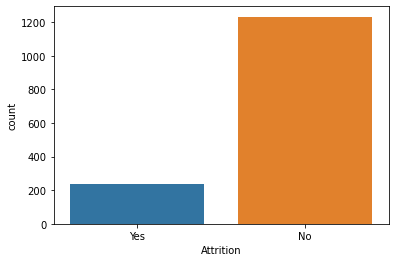

In [8]:
sns.countplot(x='Attrition',data=df_hr)

# as per above this is very highly unbalanced data set

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

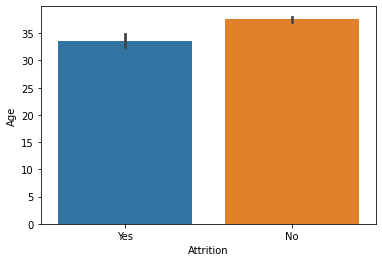

In [9]:
sns.barplot(x="Attrition",y="Age",data=df_hr)

# from the above result we can see that high avg age people are staying more

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

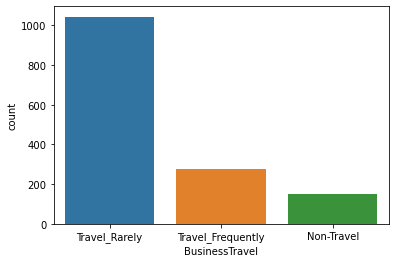

In [10]:
sns.countplot(x="BusinessTravel",data=df_hr)

# As checked the count of employees based on buisness travel is most of the employee travel rarely.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

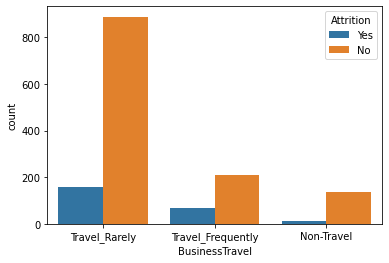

In [11]:
sns.countplot(x="BusinessTravel",data=df_hr,hue="Attrition")

# As from above checked count of each category of business travel where employee attrition is true? it can be concluded that proportion of attrition is higher where travel is frequent.

<AxesSubplot:xlabel='Department', ylabel='count'>

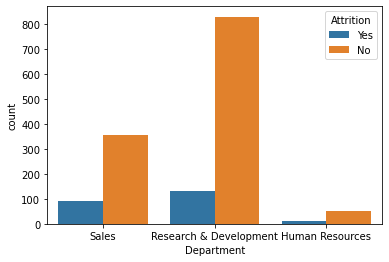

In [12]:
sns.countplot(x="Department",data=df_hr,hue="Attrition")

As checked in above  which department attrintion is high?, Research and development depertment have more attrintion.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

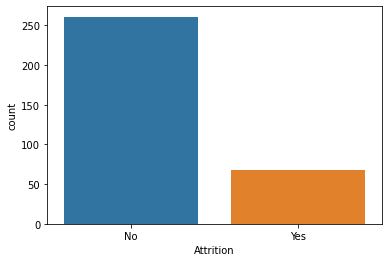

In [13]:
sns.countplot(x="Attrition",data=df_hr.loc[df_hr["DistanceFromHome"]>15])

As checked from above when distance from home is above 15 kms attrintions is less.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

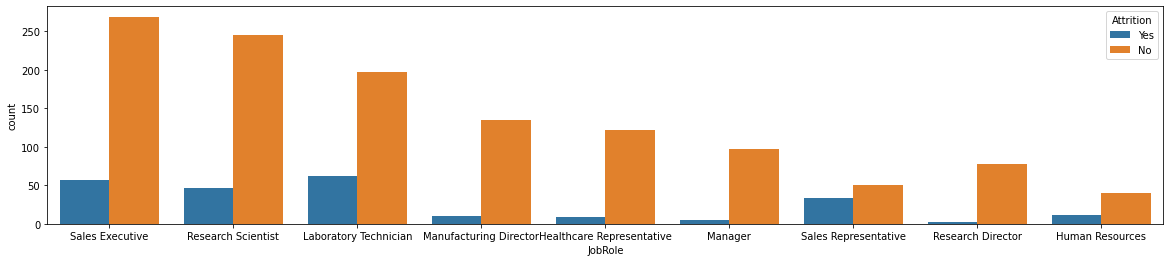

In [14]:
plt.figure(figsize=(20,4))
sns.countplot(x="JobRole",data=df_hr,hue="Attrition")

we analysed  from the above the attrition ratio in each category and take corrective actions by understanding the reason behind the attrition.

<AxesSubplot:xlabel='Gender', ylabel='count'>

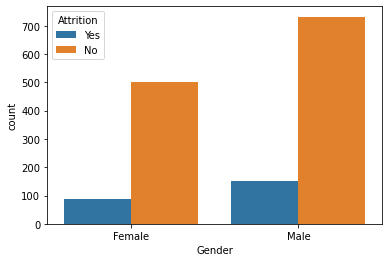

In [15]:
sns.countplot(x="Gender",data=df_hr,hue="Attrition")

As checked from the above the attrition ratio based on gender Male is high.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

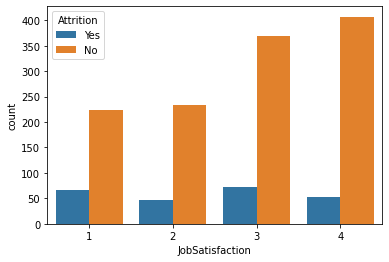

In [16]:
sns.countplot(x="JobSatisfaction",data=df_hr,hue="Attrition")

As checked from above the attrition ratio based on job satisfaction, job satisfaction increases proportion of aleavers decreases.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

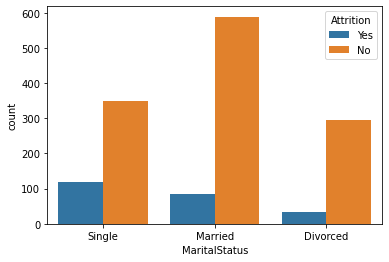

In [17]:
sns.countplot(x="MaritalStatus",data=df_hr,hue="Attrition")

As checked from above the attrition ratio in MaritalStatus, in singles ratio is higher

<AxesSubplot:xlabel='OverTime', ylabel='count'>

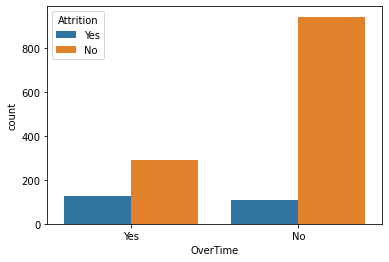

In [18]:
sns.countplot(x="OverTime",data=df_hr,hue="Attrition")

As checked from the above the proportion of attrition based on overtime, overtime is there then attrition proportion is higher.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

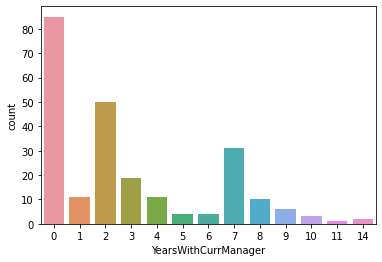

In [19]:
sns.countplot(x="YearsWithCurrManager",data=df_hr.loc[df_hr["Attrition"]=="Yes"])

we came to know that if years working wth current manager is 0 then attrition was very high Also after 2 years of working significant amount of people left so it can be new project they moved and they dint like job role or something else

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

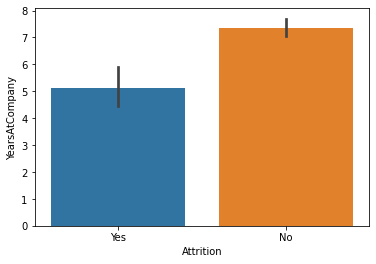

In [20]:
sns.barplot(x="Attrition",y="YearsAtCompany",data=df_hr)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

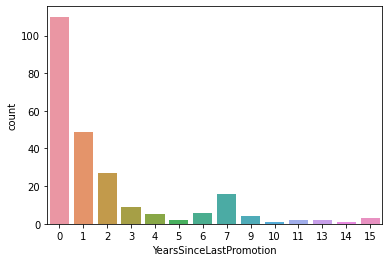

In [21]:
sns.countplot(x='YearsSinceLastPromotion' , data=df_hr[df_hr["Attrition"]=="Yes"])

Checking from the above the time laped since last promotion, majority almost half of people left not even single year passed since last promotion.

we can conclude promotion is not the fact why people left the company

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

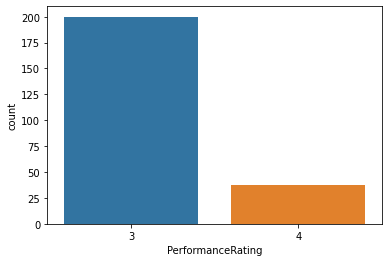

In [22]:
sns.countplot(x="PerformanceRating",data=df_hr.loc[df_hr["Attrition"]=="Yes"])

As checked from above how performnce rating is afecting attrition level, may be since they expect that their work deserves more rating and is undervalued.

Almost all the people who left were who got rating 3

<AxesSubplot:>

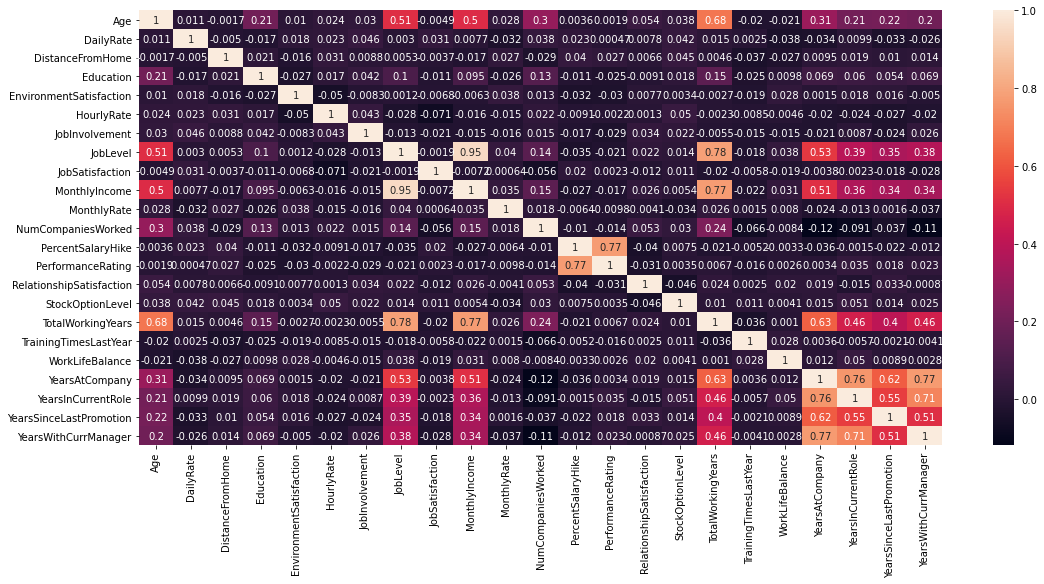

In [23]:
plt.figure(figsize=(18,8))
sns.heatmap(df_hr.corr(),annot=True)

some features are strongly correlated

In [24]:
df_x=df_hr.drop(columns=["Attrition"])
y=df_hr[["Attrition"]]

seperating dependent and independent features.

In [25]:
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


 as from the aboveTotal count of numeric features: 26 count of features which are significantly skewed: 14

In [26]:
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


as from above Total count of numeric features: 26 count of features which are significantly skewed: 3

In [27]:
print(df_x.dtypes.loc[df_x.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


there are 7 no of columns dtype:object  

In [28]:
df_x=pd.get_dummies(df_x,drop_first=True)
df_x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,...,0,0,0,0,0,1,0,1,0,0


using one hot encoding convert above columns to 1 and 0

In [29]:
from scipy.stats import zscore
z_score=abs(zscore(df_x))
print(df_x.shape)
df_x_final=df_x.loc[(z_score<3).all(axis=1)]
print(df_x_final.shape)

(1470, 44)
(856, 44)


50% data willbe lost we need to avoid it

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

converting features to common scale as we will use logistic regression also

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y


C:\Users\hp-pc\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp-pc\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, ..., 0, 0, 0])

convert target class into integers using labelencoder

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [33]:
print(model.feature_importances_)

[0.03742614 0.03030193 0.02998282 0.02437328 0.03414708 0.02878271
 0.02993523 0.02886701 0.03256156 0.03829131 0.02730505 0.02876964
 0.02755711 0.01328629 0.02892202 0.02670217 0.03916474 0.02615535
 0.03195687 0.03119122 0.03316453 0.02679581 0.03276674 0.02048386
 0.01426142 0.01157436 0.01058154 0.01453678 0.0111224  0.01644356
 0.005393   0.01235835 0.01982381 0.00549093 0.01641971 0.00397734
 0.00590057 0.00287967 0.012061   0.0095137  0.01174983 0.01430432
 0.02859023 0.06412704]


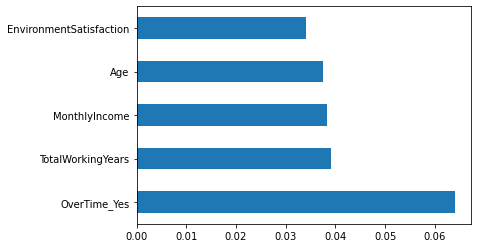

In [34]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [36]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7093203548970627
auc roc score corresponding to  43  is  0.8015332931346368
auc roc score corresponding to  44  is  0.7726333017486432
auc roc score corresponding to  45  is  0.7118614867775003
auc roc score corresponding to  46  is  0.7417520888965458
auc roc score corresponding to  47  is  0.7377035059005943
auc roc score corresponding to  48  is  0.7888276337324489
auc roc score corresponding to  49  is  0.7458006718924972
auc roc score corresponding to  50  is  0.7832715996209838
auc roc score corresponding to  51  is  0.820785597381342
auc roc score corresponding to  52  is  0.7767249547764665
auc roc score corresponding to  53  is  0.8166939443535188
auc roc score corresponding to  54  is  0.7366698251356706
auc roc score corresponding to  55  is  0.7305969506417435
auc roc score corresponding to  56  is  0.7503660952709106
auc roc score corresponding to  57  is  0.7204754931518649
auc roc score corresponding to  58  is  0.710354035661986

70

In [37]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8425184815957902
standard deviation in roc auc score for logistic classifier:  0.018609160244716556
[0.84281843 0.84569783 0.83607546 0.81505728 0.87294341]


In [38]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6419157550176586
auc roc score corresponding to  43  is  0.6029373761736583
auc roc score corresponding to  44  is  0.5613747954173487
auc roc score corresponding to  45  is  0.5791196485485399
auc roc score corresponding to  46  is  0.65966060814885
auc roc score corresponding to  47  is  0.6378671720217073
auc roc score corresponding to  48  is  0.6606512188819019
auc roc score corresponding to  49  is  0.5314841932983031
auc roc score corresponding to  50  is  0.5958308209148074
auc roc score corresponding to  51  is  0.6150831251615126
auc roc score corresponding to  52  is  0.5345421655612025
auc roc score corresponding to  53  is  0.5684813506761994
auc roc score corresponding to  54  is  0.5897579464208803
auc roc score corresponding to  55  is  0.6115083125161513
auc roc score corresponding to  56  is  0.5279524506848134
auc roc score corresponding to  57  is  0.5547850805409595
auc roc score corresponding to  58  is  0.5618916357998105

86

In [39]:
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.617510191490062
standard deviation in auc roc score for decision tree classifier:  0.017381906508074915
[0.62271341 0.64761179 0.6753381  0.58669997 0.64596434]


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators=[10,100,500]
criterion=['entropy','gini']
min_samples_split=[2,5,8]
min_samples_leaf=[1,2,4]
parameters={'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=3,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [41]:
rf_clf=RandomForestClassifier(n_estimators=500,criterion='entropy',min_samples_leaf=2,min_samples_split=2,)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.5755017658713066
auc roc score corresponding to  43  is  0.6221035403566199
auc roc score corresponding to  44  is  0.6362735808424498
auc roc score corresponding to  45  is  0.6307175467309846
auc roc score corresponding to  46  is  0.6327418382289604
auc roc score corresponding to  47  is  0.6155138254802308
auc roc score corresponding to  48  is  0.6479455594797141
auc roc score corresponding to  49  is  0.5835989318632095
auc roc score corresponding to  50  is  0.5815746403652338
auc roc score corresponding to  51  is  0.6048755276078904
auc roc score corresponding to  52  is  0.6048755276078904
auc roc score corresponding to  53  is  0.59423722973555
auc roc score corresponding to  54  is  0.5582737531225773
auc roc score corresponding to  55  is  0.5982858127315014
auc roc score corresponding to  56  is  0.5694288913773797
auc roc score corresponding to  57  is  0.573477474373331
auc roc score corresponding to  58  is  0.6200792488586442


88

In [42]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
import warnings 
warnings.filterwarnings("ignore") 
leaf_size = list(range(1,10)) 
n_neighbors = list(range(1,30)) 
p=[1,2] 
parameters={"n_neighbors":n_neighbors,"leaf_size":leaf_size, "p":p} 
kc=KNeighborsClassifier() 
clf = GridSearchCV(kc, parameters, cv=3,scoring="roc_auc") 
clf.fit(x,y) 
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 28, 'p': 1}

In [43]:
kc=KNeighborsClassifier(n_neighbors=28, leaf_size=1,p=1 )
max_aucroc_score(kc,x,y)


auc roc score corresponding to  42  is  0.65918683779826
auc roc score corresponding to  43  is  0.7630286846412266
auc roc score corresponding to  44  is  0.6971746059092083
auc roc score corresponding to  45  is  0.6485485399259195
auc roc score corresponding to  46  is  0.6495822206908435
auc roc score corresponding to  47  is  0.6976914462916702
auc roc score corresponding to  48  is  0.6804634335429408
auc roc score corresponding to  49  is  0.6916185717977431
auc roc score corresponding to  50  is  0.6095270910500473
auc roc score corresponding to  51  is  0.7681109484021018
auc roc score corresponding to  52  is  0.6976914462916702
auc roc score corresponding to  53  is  0.706779223016625
auc roc score corresponding to  54  is  0.6748643293996037
auc roc score corresponding to  55  is  0.6277887845637005
auc roc score corresponding to  56  is  0.685545697303816
auc roc score corresponding to  57  is  0.672366267551038
auc roc score corresponding to  58  is  0.5943664398311653
au

51

In [44]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.1,1,10,100], 'gamma': [0.0001, 0.001,0.01, 0.1,1,10 ]}
clf = GridSearchCV(svc, parameters, cv=3,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [45]:
svc=SVC(kernel="rbf",C=1,gamma=0.01)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7052287018692394
auc roc score corresponding to  43  is  0.7584201912309415
auc roc score corresponding to  44  is  0.6945904039968989
auc roc score corresponding to  45  is  0.6778792316306314
auc roc score corresponding to  46  is  0.6677577741407529
auc roc score corresponding to  47  is  0.7138427082436043
auc roc score corresponding to  48  is  0.728529589111896
auc roc score corresponding to  49  is  0.7376604358687227
auc roc score corresponding to  50  is  0.7214230338530451
auc roc score corresponding to  51  is  0.7609613231113791
auc roc score corresponding to  52  is  0.7310707209923335
auc roc score corresponding to  53  is  0.7639762253424068
auc roc score corresponding to  54  is  0.7265052976139202
auc roc score corresponding to  55  is  0.6991558273753122
auc roc score corresponding to  56  is  0.6951072443793608
auc roc score corresponding to  57  is  0.7158669997415799
auc roc score corresponding to  58  is  0.682444655009044

82

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [47]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.6337755189938841
auc roc score corresponding to  43  is  0.6519941424756655
auc roc score corresponding to  44  is  0.6352829701093978
auc roc score corresponding to  45  is  0.6525109828581273
auc roc score corresponding to  46  is  0.654535274356103
auc roc score corresponding to  47  is  0.6879576190886381
auc roc score corresponding to  48  is  0.6585838573520545
auc roc score corresponding to  49  is  0.6398483934878112
auc roc score corresponding to  50  is  0.6180549573606685
auc roc score corresponding to  51  is  0.66060814885003
auc roc score corresponding to  52  is  0.586656904126109
auc roc score corresponding to  53  is  0.6585838573520545
auc roc score corresponding to  54  is  0.5907054871220605
auc roc score corresponding to  55  is  0.6114652424842795
auc roc score corresponding to  56  is  0.5679214402618659
auc roc score corresponding to  57  is  0.6033680764923766
auc roc score corresponding to  58  is  0.6099577913687657
a

80

In [48]:
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
max_aucroc_score(ada_clf,x,y)

auc roc score corresponding to  42  is  0.7179774313032992
auc roc score corresponding to  43  is  0.8060987165130501
auc roc score corresponding to  44  is  0.7139288483073478
auc roc score corresponding to  45  is  0.6693513653200105
auc roc score corresponding to  46  is  0.6926522525626669
auc roc score corresponding to  47  is  0.7286157291756397
auc roc score corresponding to  48  is  0.7083728141958825
auc roc score corresponding to  49  is  0.7108708760444483
auc roc score corresponding to  50  is  0.7351623740201568
auc roc score corresponding to  51  is  0.8071323972779738
auc roc score corresponding to  52  is  0.7650960461710743
auc roc score corresponding to  53  is  0.7027737100525455
auc roc score corresponding to  54  is  0.6562150055991042
auc roc score corresponding to  55  is  0.7017400292876217
auc roc score corresponding to  56  is  0.7174605909208372
auc roc score corresponding to  57  is  0.6976914462916702
auc roc score corresponding to  58  is  0.65466448445171

51

In [49]:
#Lets choose svm as our final model and random state 82
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 70,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
svc=SVC(kernel="linear",C=0.1,probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[193  54]
 [  5  42]]
f1 score is :  0.5874125874125874
classification report 
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       247
           1       0.44      0.89      0.59        47

    accuracy                           0.80       294
   macro avg       0.71      0.84      0.73       294
weighted avg       0.89      0.80      0.82       294

AUC ROC Score:  0.8374967697476094


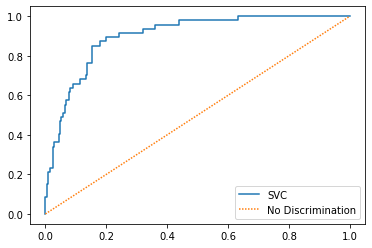

In [51]:
fpr, tpr, thresholds = roc_curve(y_test,svc.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,svc.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='SVC')
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(1, 1))
plt.legend()

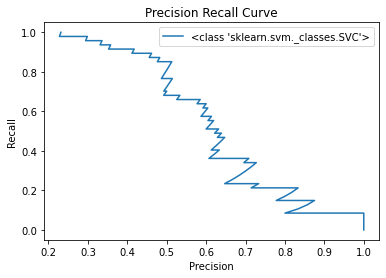

In [72]:
precision, recall, thresholds = precision_recall_curve(y_test,svc.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(precision,recall, label=SVC)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()

In [71]:
roc_dict = {} #ROC dict for TPR and FPR values
prc_dict = {} #precision recall curve

def modify_roc_dict(clf, y_test, x_test, name ,dict_modify): #modifies a dictionary in place and adds keys for ROC metrics
  fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
  clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
  dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, x_test, name ,dict_modify): #modifies a dictionary in place and adds keys for precision recall metrics
  precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
  clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
  dict_modify[name] = clf_prc_dict

In [69]:
def fit_score_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
  clf.fit(x_train, y_train) #fit to train data
  y_pred = clf.predict(x_test) #make predictions
  clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)) #make dataframe from report
  clf_report['clf'] = name #add clf name as column
  return clf_report

In [55]:
lr_report = fit_score_clf(svc, x_train, y_train, x_test, y_test, name='SupportVector')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.974747,0.437500,0.79932,0.706124,0.888861,SupportVector
recall,0.781377,0.893617,0.79932,0.837497,0.799320,SupportVector
f1-score,0.867416,0.587413,0.79932,0.727414,0.822653,SupportVector
support,247.000000,47.000000,0.79932,294.000000,294.000000,SupportVector


In [56]:
lr_report = fit_score_clf(rf_clf, x_train, y_train, x_test, y_test, name='RandomForest')


In [57]:
lr_report = fit_score_clf(ada_clf, x_train, y_train, x_test, y_test, name='AdaBoost')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.922280,0.316832,0.714286,0.619556,0.825490,AdaBoost
recall,0.720648,0.680851,0.714286,0.700749,0.714286,AdaBoost
f1-score,0.809091,0.432432,0.714286,0.620762,0.748877,AdaBoost
support,247.000000,47.000000,0.714286,294.000000,294.000000,AdaBoost


In [68]:
lr_report = fit_score_clf(gb_clf, x_train, y_train, x_test, y_test, name='GradientBoosting')
lr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.890977,0.642857,0.867347,0.766917,0.851312,GradientBoosting
recall,0.959514,0.382979,0.867347,0.671246,0.867347,GradientBoosting
f1-score,0.923977,0.480000,0.867347,0.701988,0.853001,GradientBoosting
support,247.000000,47.000000,0.867347,294.000000,294.000000,GradientBoosting


In [59]:
#see keys we have
roc_dict.keys()

dict_keys([])

In [67]:
#see keys we have
roc_dict.keys()

dict_keys([])

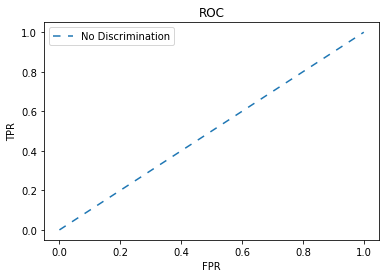

In [66]:
for key in roc_dict:
    clf = roc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.legend()
plt.show()

In [65]:
modify_prc_dict(clf=svc,y_test=y_test,x_test=x_test,name='SupportVector',dict_modify=prc_dict)
modify_prc_dict(clf=rf_clf,y_test=y_test,x_test=x_test,name='RandomForest',dict_modify=prc_dict)
modify_prc_dict(clf=ada_clf,y_test=y_test,x_test=x_test,name='AdaBoost',dict_modify=prc_dict)
modify_prc_dict(clf=gb_clf,y_test=y_test,x_test=x_test,name='GradientBoosting',dict_modify=prc_dict)

In [63]:
prc_dict.keys()

dict_keys(['SupportVector', 'RandomForest', 'AdaBoost', 'GradientBoosting'])

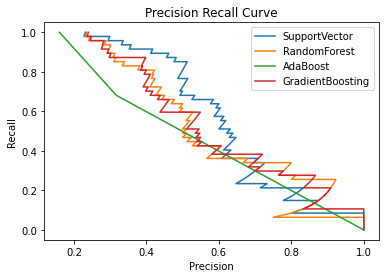

In [64]:
for key in prc_dict:
  clf = prc_dict[key]
  plt.plot(clf['precision'], clf['recall'], label=key)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

above curve verified that the svc model is giving best output